In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("StudentsPerformance.csv")

In [3]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
parental_level_of_education = data["parental level of education"].unique()
gender = data["gender"].unique()
test_preparation_course = data["test preparation course"].unique()
lunch = data["lunch"].unique()

In [7]:
def addText(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2, height+1,int(height), ha="center", va="bottom")

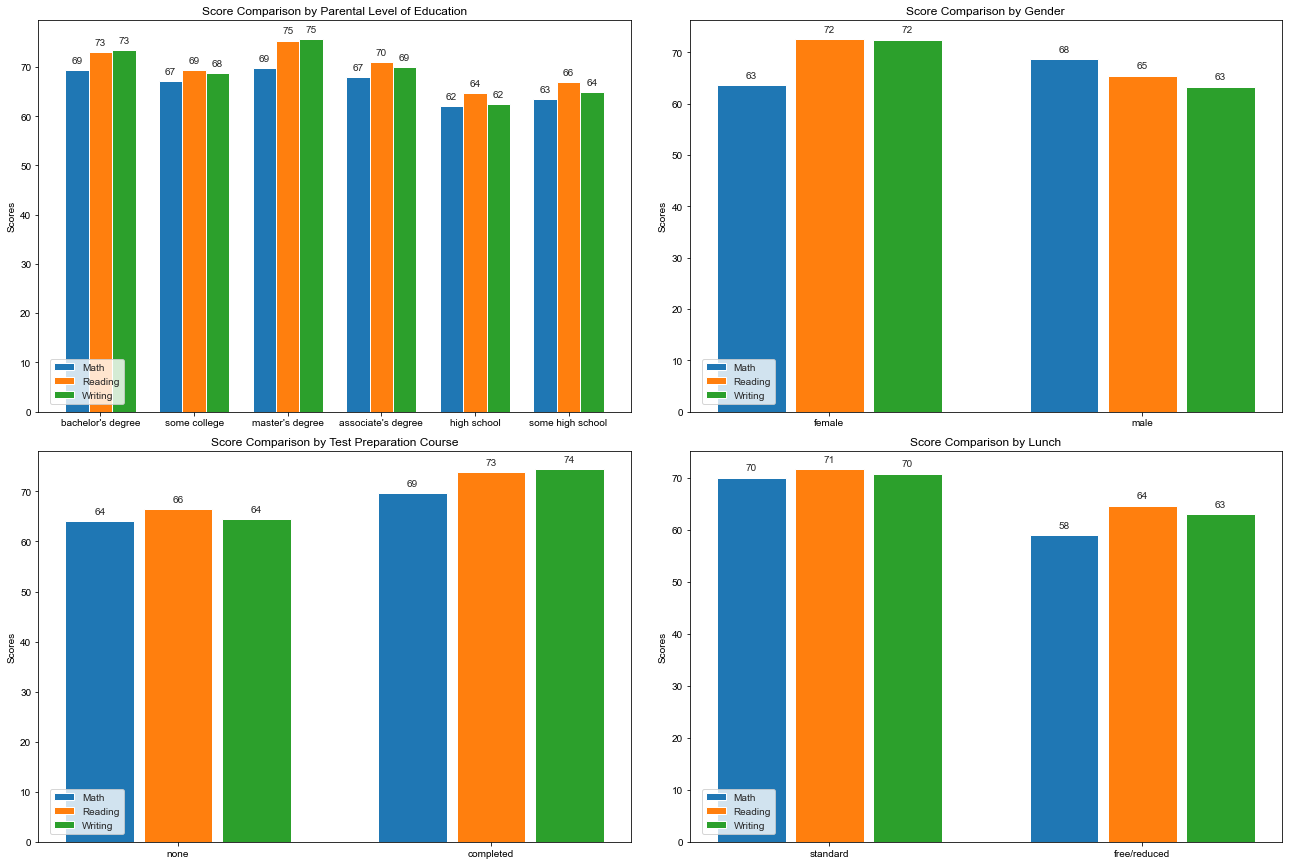

In [8]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = (18, 12))
fig.tight_layout()

sns.set_style("whitegrid");
fig.subplots_adjust(wspace=0.1, hspace=0.1)
# ax 0 0
math_score = []
reading_score = []
writing_score = []
for level in parental_level_of_education:
    math_score.append(np.average(np.array(data.loc[(data["parental level of education"] == level)]["math score"])))
    reading_score.append(np.average(np.array(data.loc[(data["parental level of education"] == level)]["reading score"])))
    writing_score.append(np.average(np.array(data.loc[(data["parental level of education"] == level)]["writing score"])))


idx = np.arange(len(parental_level_of_education))
ax[0,0].set_xticks(idx)
ax[0,0].set_xticklabels(parental_level_of_education, rotation=0)
ax[0,0].set_ylabel('Scores')
ax[0,0].set_title("Score Comparison by Parental Level of Education")
rects1 = ax[0,0].bar(idx-0.25, math_score, 0.25, label="Math")
rects2 = ax[0,0].bar(idx, reading_score, 0.25, label="Reading")
rects3 = ax[0,0].bar(idx+0.25, writing_score, 0.25, label="Writing")

ax[0,0].legend(loc=[0.02,0.02])

# ax 0 1
math_score = []
reading_score = []
writing_score = []
for level in gender:
    math_score.append(np.average(np.array(data.loc[(data["gender"] == level)]["math score"])))
    reading_score.append(np.average(np.array(data.loc[(data["gender"] == level)]["reading score"])))
    writing_score.append(np.average(np.array(data.loc[(data["gender"] == level)]["writing score"])))
    
idx = np.arange(len(gender))

ax[0,1].set_xticks(idx)
ax[0,1].set_xticklabels(gender, rotation=0)
ax[0,1].set_ylabel('Scores')
ax[0,1].set_title("Score Comparison by Gender")
rects4 = ax[0,1].bar(idx-0.25, math_score, 0.22, label="Math")
rects5 = ax[0,1].bar(idx, reading_score, 0.22, label="Reading")
rects6 = ax[0,1].bar(idx+0.25, writing_score, 0.22, label="Writing")

ax[0,1].legend(loc=[0.02,0.02])

# ax 1 0
math_score = []
reading_score = []
writing_score = []
for level in test_preparation_course:
    math_score.append(np.average(np.array(data.loc[(data["test preparation course"] == level)]["math score"])))
    reading_score.append(np.average(np.array(data.loc[(data["test preparation course"] == level)]["reading score"])))
    writing_score.append(np.average(np.array(data.loc[(data["test preparation course"] == level)]["writing score"])))
    
idx = np.arange(len(test_preparation_course))

ax[1,0].set_xticks(idx)
ax[1,0].set_xticklabels(test_preparation_course, rotation=0)
ax[1,0].set_ylabel('Scores')
ax[1,0].set_title("Score Comparison by Test Preparation Course")
rects7 = ax[1,0].bar(idx-0.25, math_score, 0.22, label="Math")
rects8 = ax[1,0].bar(idx, reading_score, 0.22, label="Reading")
rects9 = ax[1,0].bar(idx+0.25, writing_score, 0.22, label="Writing")

ax[1,0].legend(loc=[0.02,0.02]);

# ax 1 1
math_score = []
reading_score = []
writing_score = []
for level in lunch:
    math_score.append(np.average(np.array(data.loc[(data["lunch"] == level)]["math score"])))
    reading_score.append(np.average(np.array(data.loc[(data["lunch"] == level)]["reading score"])))
    writing_score.append(np.average(np.array(data.loc[(data["lunch"] == level)]["writing score"])))
    
idx = np.arange(len(lunch))
ax[1,1].set_xticks(idx)
ax[1,1].set_xticklabels(lunch, rotation=0)
ax[1,1].set_ylabel('Scores')
ax[1,1].set_title("Score Comparison by Lunch")
rects10 = ax[1,1].bar(idx-0.25, math_score, 0.22, label="Math")
rects11 = ax[1,1].bar(idx, reading_score, 0.22, label="Reading")
rects12 = ax[1,1].bar(idx+0.25, writing_score, 0.22, label="Writing")
ax[1,1].legend(loc=[0.02,0.02]);       

addText(rects1, ax[0,0])
addText(rects2, ax[0,0])
addText(rects3, ax[0,0])
addText(rects4, ax[0,1])
addText(rects5, ax[0,1])
addText(rects6, ax[0,1])
addText(rects7, ax[1,0])
addText(rects8, ax[1,0])
addText(rects9, ax[1,0])
addText(rects10, ax[1,1])
addText(rects11, ax[1,1])
addText(rects12, ax[1,1])

In [9]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']